In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx import DiGraph
import numpy as np
import os
import sys
from typing import List, Tuple

In [2]:
sys.path.append("../")
test_dir = os.path.abspath("../tests")
sys.path.append(test_dir)

In [3]:
from job_scheduler.model import Job, Operation, Schedule, ScheduledJob
from job_scheduler.optimizer import ScheduleOptimizer
from job_scheduler.scheduler import JobScheduler

In [4]:
job_1 = ScheduledJob(job_id=1, operations=[Operation(id=1, time=3), Operation(id=2, time=6)])
job_2 = ScheduledJob(job_id=2, operations=[Operation(id=1, time=10), Operation(id=2, time=1)])
job_3 = ScheduledJob(job_id=3, operations=[Operation(id=1, time=3), Operation(id=2, time=2)])
job_4 = ScheduledJob(job_id=4, operations=[Operation(id=1, time=2), Operation(id=2, time=4)])
job_5 = ScheduledJob(job_id=5, operations=[Operation(id=1, time=8), Operation(id=2, time=8)])

job_operations = [job_4, job_1, job_5, job_3, job_2]
job_operations

[ScheduledJob(job_id=4, operations=[Operation(id=1, time=2), Operation(id=2, time=4)]),
 ScheduledJob(job_id=1, operations=[Operation(id=1, time=3), Operation(id=2, time=6)]),
 ScheduledJob(job_id=5, operations=[Operation(id=1, time=8), Operation(id=2, time=8)]),
 ScheduledJob(job_id=3, operations=[Operation(id=1, time=3), Operation(id=2, time=2)]),
 ScheduledJob(job_id=2, operations=[Operation(id=1, time=10), Operation(id=2, time=1)])]

In [9]:
job_scheduler = JobScheduler(num_of_machines=2, num_ops_per_machine=2, scheduled_jobs=job_operations)
job_scheduler

In [10]:
schedule = job_scheduler.generate_schedule()
schedule

Schedule(jobs=[Job(id=4, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x11e87f100>), Job(id=1, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x11e87f250>), Job(id=5, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x11e87f2e0>), Job(id=3, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x11e87f130>), Job(id=2, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x11e860cd0>)], debug=False)

In [11]:
fig_size = (4, 4)

## Job 4

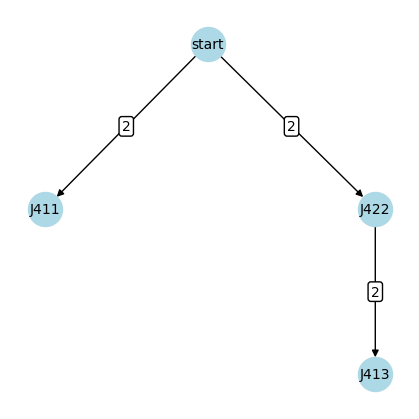

In [12]:
JobScheduler.visualize_schedule(schedule.jobs[0].operations, fig_size)

## Job 1

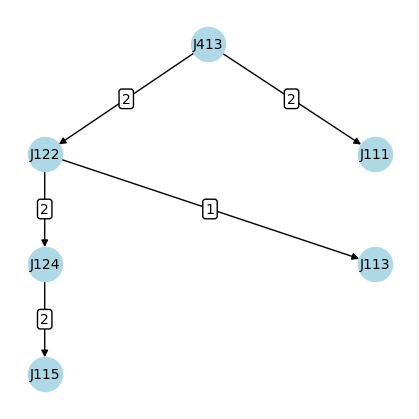

In [13]:
JobScheduler.visualize_schedule(schedule.jobs[1].operations, fig_size)

## Job 5

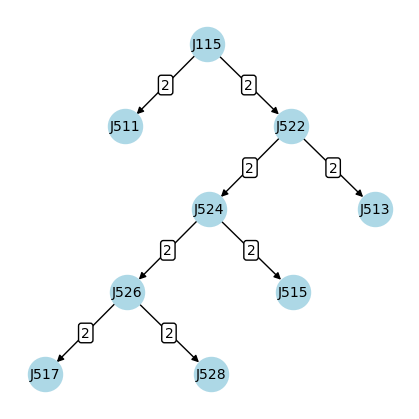

In [14]:
JobScheduler.visualize_schedule(schedule.jobs[2].operations, fig_size)

In [15]:
## Job 3

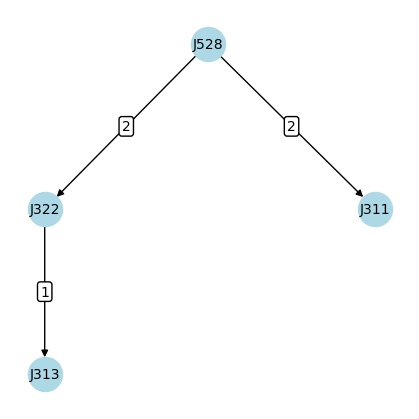

In [16]:
JobScheduler.visualize_schedule(schedule.jobs[3].operations, fig_size)

## Job 2

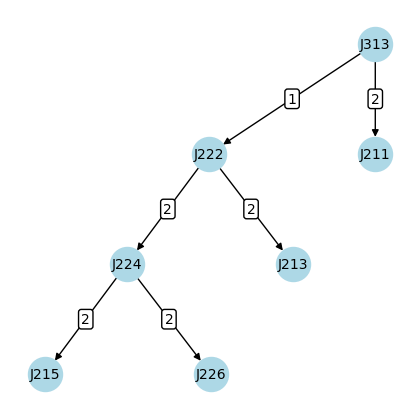

In [17]:
JobScheduler.visualize_schedule(schedule.jobs[4].operations, fig_size)

# R3